# 1. Importing required packages

In [75]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(6)
import math
style.use('ggplot')

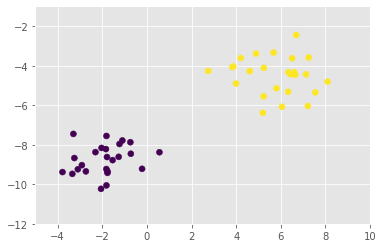

In [81]:
from sklearn.datasets.samples_generator import make_blobs

(X,y) =  make_blobs(n_samples=50,n_features=2,centers=2,cluster_std=1.05,random_state=40)
#we need to add 1 to X values (we can say its bias)
X1 = np.c_[np.ones((X.shape[0])),X]

plt.scatter(X1[:,1],X1[:,2],marker='o',c=y)
plt.axis([-5,10,-12,-1])
plt.show()

In [3]:
postiveX=[]
negativeX=[]
for i,v in enumerate(y):
    if v==0:
        negativeX.append(X[i])
    else:
        postiveX.append(X[i])

#our data dictionary
data_dict = {-1:np.array(negativeX), 1:np.array(postiveX)}

In [46]:
#all the required variables 
w=[] #weights 2 dimensional vector
b=[] #bias

max_feature_value=float('-inf')
min_feature_value=float('+inf')
        
for yi in data_dict:
    if np.amax(data_dict[yi])>max_feature_value:
        max_feature_value=np.amax(data_dict[yi])
                
    if np.amin(data_dict[yi])<min_feature_value:
        min_feature_value=np.amin(data_dict[yi])
        
learning_rate = [max_feature_value * 0.1, max_feature_value * 0.01, max_feature_value * 0.001,]

In [47]:
def SVM_Training(data_dict):
    i=1
    global w
    global b
    # { ||w||: [w,b] }
    length_Wvector = {}
    transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
    
    b_step_size = 2
    b_multiple = 5
    w_optimum = max_feature_value*0.5

    for lrate in learning_rate:
        
        w = np.array([w_optimum,w_optimum])     
        optimized = False
        while not optimized:
            #b=[-maxvalue to maxvalue] we wanna maximize the b values so check for every b value
            for b in np.arange(-1*(max_feature_value*b_step_size), max_feature_value*b_step_size, lrate*b_multiple):
                for transformation in transforms:  # transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
                    w_t = w*transformation
                    
                    correctly_classified = True
                    
                    # every data point should be correct
                    for yi in data_dict:
                        for xi in data_dict[yi]:
                            if yi*(np.dot(w_t,xi)+b) < 1:  # we want  yi*(np.dot(w_t,xi)+b) >= 1 for correct classification
                                correctly_classified = False
                                
                    if correctly_classified:
                        length_Wvector[np.linalg.norm(w_t)] = [w_t,b] #store w, b for minimum magnitude
            
            if w[0] < 0:
                optimized = True
            else:
                w = w - lrate

        norms = sorted([n for n in length_Wvector])
        
        minimum_wlength = length_Wvector[norms[0]]
        w = minimum_wlength[0]
        b = minimum_wlength[1]
        
        w_optimum = w[0]+lrate*2

In [48]:
SVM_Training(data_dict)

In [64]:
def visualize(data_dict):
       
        colors = {1:'r',-1:'b'}
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        
        [[ax.scatter(x[0],x[1],s=100,color=colors[i]) for x in data_dict[i]] for i in data_dict]
        
        #plt.scatter(X1[:,1],X1[:,2],marker='o',c=y)

        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane_value(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        datarange = (min_feature_value*0.9,max_feature_value*1.)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane_value(hyp_x_min, w, b, 1)
        psv2 = hyperplane_value(hyp_x_max, w, b, 1)
        ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane_value(hyp_x_min, w, b, -1)
        nsv2 = hyperplane_value(hyp_x_max, w, b, -1)
        ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        # (w.x+b) = 0
        # positive support vector hyperplane
        db1 = hyperplane_value(hyp_x_min, w, b, 0)
        db2 = hyperplane_value(hyp_x_max, w, b, 0)
        ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')
        
        
        plt.show()

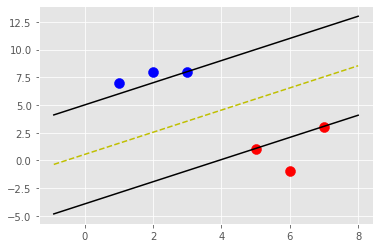

In [65]:
visualize(data_dict)

In [66]:
def predict(features):
        # sign( x.w+b )
        dot_result = np.sign(np.dot(np.array(features),w)+b)
        return dot_result.astype(int)
    
for i in X[:5]:
    print(predict(i),end=',  ')

1,  1,  1,  1,  1,  

In [67]:
l=[]
for xi in X:
    
    l.append(predict(xi[:6]))
l=np.array(l).astype(int)
l

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [12]:
X[4]

array([-1.8171622 , -9.22909875])

In [13]:
for i, v in enumerate(y):
    if v==0:
        y[i]=-1
y

array([ 1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,
        1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1])

In [14]:
error = sum((l-y)**2)
error

0